# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [69]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=583255f060225239273c51733ca4e366"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Perform API request
        response = requests.get(city_url)
        # Check if status code is 200
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ola
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | krasnapollye
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | cockburn town
Processing Record 10 of Set 1 | sao jose da coroa grande
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | kochenevo
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | changleng
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | car

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,karratha,-20.7377,116.8463,303.29,32,2,6.65,AU,1699932552
1,carnarvon,-24.8667,113.6333,295.44,65,98,3.78,AU,1699932552
2,horn,51.8715,8.9451,284.98,82,100,9.78,DE,1699932553
3,jian'ou,27.0469,118.3253,289.39,59,96,0.82,CN,1699932553
4,ushuaia,-54.8000,-68.3000,274.96,75,0,2.06,AR,1699932324


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,karratha,-20.7377,116.8463,303.29,32,2,6.65,AU,1699932552
1,carnarvon,-24.8667,113.6333,295.44,65,98,3.78,AU,1699932552
2,horn,51.8715,8.9451,284.98,82,100,9.78,DE,1699932553
3,jian'ou,27.0469,118.3253,289.39,59,96,0.82,CN,1699932553
4,ushuaia,-54.8000,-68.3000,274.96,75,0,2.06,AR,1699932324


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

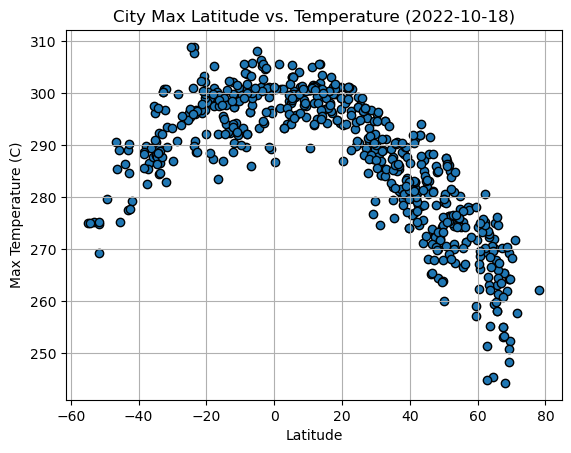

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker ="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

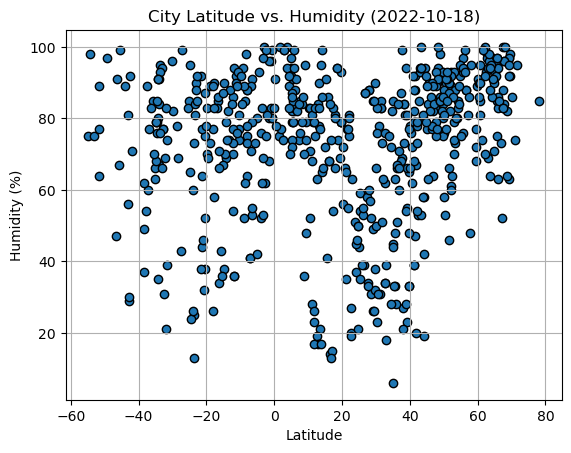

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

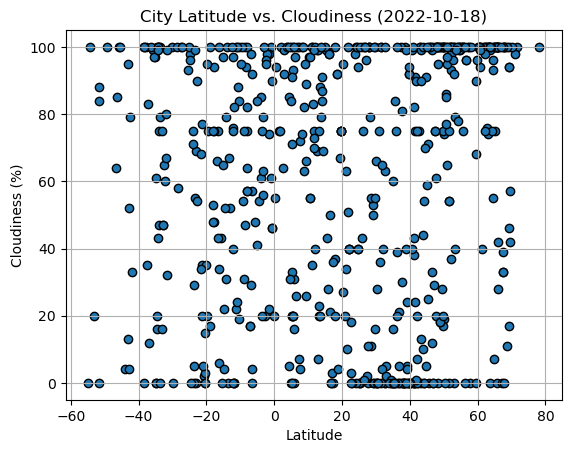

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

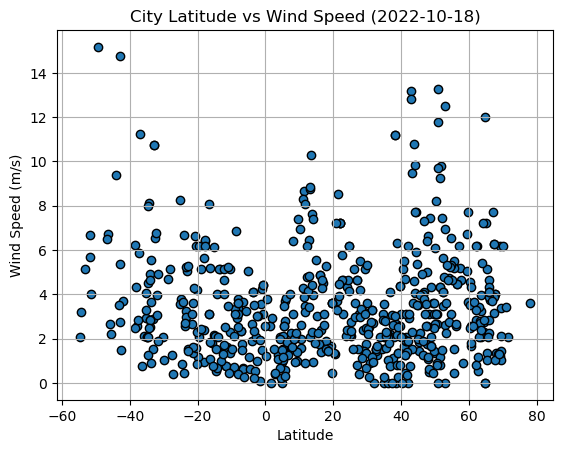

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    print(f'Linear equation: {line_eq}')
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,horn,51.8715,8.9451,284.98,82,100,9.78,DE,1699932553
3,jian'ou,27.0469,118.3253,289.39,59,96,0.82,CN,1699932553
5,bethel,41.3712,-73.4140,277.00,82,0,2.06,US,1699932553
10,vilyuchinsk,52.9306,158.4028,270.89,70,100,2.62,RU,1699932555
11,tabou,4.4230,-7.3528,298.50,89,5,2.08,CI,1699932555


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,karratha,-20.7377,116.8463,303.29,32,2,6.65,AU,1699932552
1,carnarvon,-24.8667,113.6333,295.44,65,98,3.78,AU,1699932552
4,ushuaia,-54.8000,-68.3000,274.96,75,0,2.06,AR,1699932324
6,kirakira,-10.4544,161.9205,300.17,81,84,2.31,SB,1699932554
7,trenggalek,-8.0500,111.7167,303.78,64,82,3.40,ID,1699932554


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8896018541476827
Linear equation: y =-0.61x + 306.40


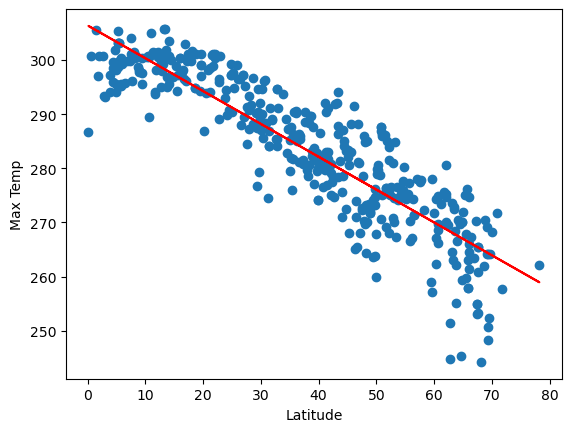

In [ ]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.687392273295554
Linear equation: y = 0.38x + 302.28


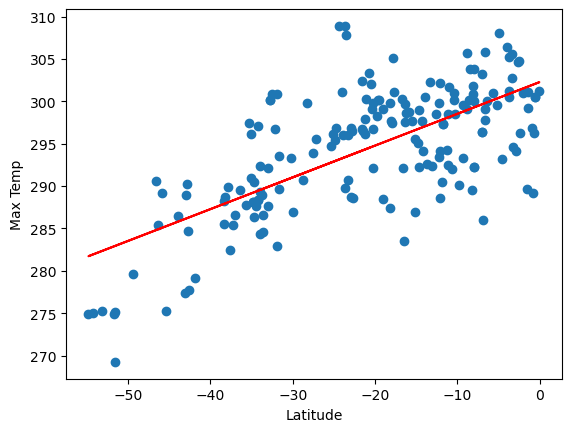

In [ ]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** 

- There is a somewhat strong negative correlation between temperature and latitude with a correlation coefficient of -0.8896018541476827 on Northern Hemisphere.
- There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.687392273295554 on Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2713687217509898
Linear equation: y = 0.30x + 61.93


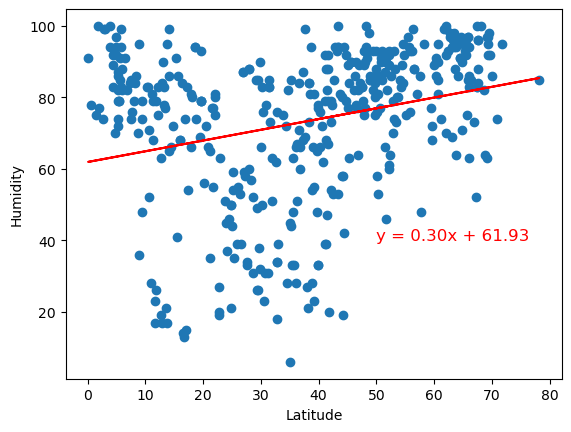

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))


The r-value is: 0.06975212330174249
Linear equation: y = 0.10x + 74.37


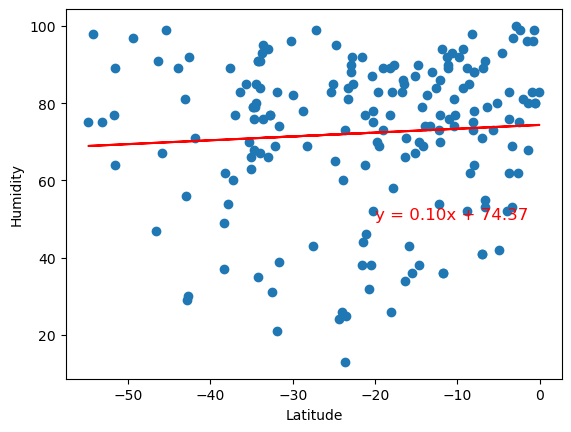

In [ ]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))


**Discussion about the linear relationship:** 

- There is a relatively strong positive correlation between humidity and latitude with a correlation coefficient of 0.2713687217509898 on Northern Hemisphere.
- There is a relatively strong positive correlation correlation between humidity and latitude with a correlation coefficient of 0.06975212330174249 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1587453246162637
Linear equation: y = 0.32x + 47.39


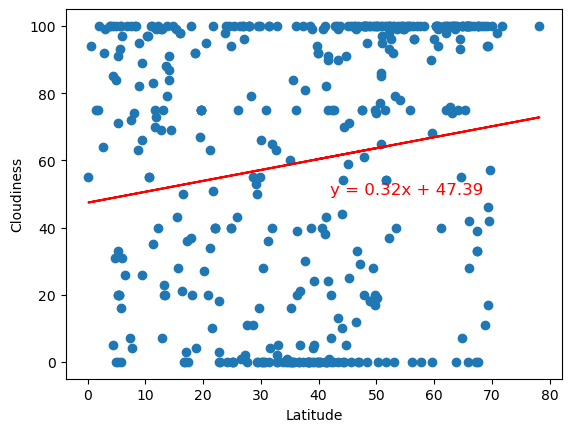

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: -0.0070695829056857395
Linear equation: y =-0.02x + 58.19


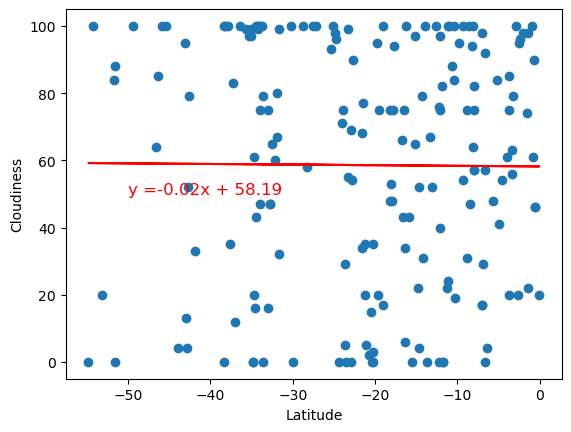

In [ ]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** 
- There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.1587453246162637 on Northern Hemisphere.
- There is a relatively weak negative correlation between cloudiness and latitude with a correlation coefficient of -0.0070695829056857395 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11128773033778352
Linear equation: y = 0.01x + 2.83


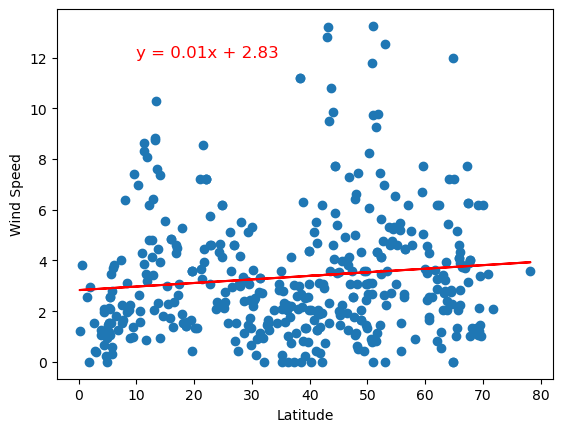

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.35479237185101087
Linear equation: y =-0.06x + 2.10


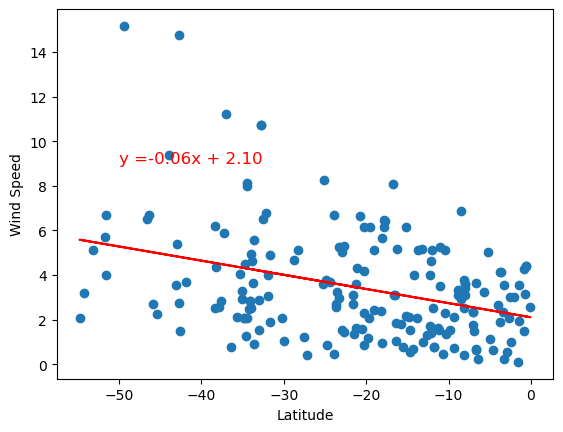

In [ ]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))